# CO543 - Image Processing
## Lab 03

- E/19/129
- K. H. Gunawardana


In [97]:
# import modules
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [98]:
def showImg(I, name="Image"):
    plt.figure(figsize=(10, 8))  
    if len(I.shape) == 2:
        plt.imshow(I, cmap='gray')
    else:
        plt.imshow(I)

    plt.title(name)
    plt.show()

def show2Img(A, B, title=None, A_name="Input", B_name="Output"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8)) 
    
    if len(A.shape) == 2:
        ax1.imshow(A, cmap='gray')
    else:
        ax1.imshow(A)
    ax1.set_title(A_name)

    if len(B.shape) == 2:
        ax2.imshow(B, cmap='gray')
    else:
        ax2.imshow(B)
    ax2.set_title(B_name)

    plt.show()

def show3Img(A, B, C, title=None, A_name="Input", B_name="Output", C_name="Output"):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 20)) 
    
    if len(A.shape) == 2:
        ax1.imshow(A, cmap='gray')
    else:
        ax1.imshow(A)
    ax1.set_title(A_name)

    if len(B.shape) == 2:
        ax2.imshow(B, cmap='gray')
    else:
        ax2.imshow(B)
    ax2.set_title(B_name)

    if len(C.shape) == 2:
        ax3.imshow(C, cmap='gray')
    else:
        ax3.imshow(C)
    ax3.set_title(C_name)

    plt.show()

def viewImg(A):
    cv2.imshow('image',A)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def plot_two_histograms(image1, image2, title=None):
    # Calculate histograms
    def calculate_histogram(image):
        if len(image.shape) == 2:  # Grayscale image
            return cv2.calcHist([image], [0], None, [256], [0, 256])
        else:  # Color image
            hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
            hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
            hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])
            return hist_b, hist_g, hist_r

    hist1 = calculate_histogram(image1)
    hist2 = calculate_histogram(image2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the histograms
    def plot_histogram(ax, hist, title, is_gray):
        if is_gray:
            ax.plot(hist, color='black')
            ax.set_title(title)
            ax.set_xlim([0, 256])
        else:
            colors = ('b', 'g', 'r')
            for h, color in zip(hist, colors):
                ax.plot(h, color=color)
            ax.set_title(title)
            ax.set_xlim([0, 256])

    is_gray1 = len(image1.shape) == 2
    is_gray2 = len(image2.shape) == 2

    plot_histogram(ax1, hist1, 'Histogram 1', is_gray1)
    plot_histogram(ax2, hist2, 'Histogram 2', is_gray2)

    # Set common labels
    for ax in (ax1, ax2):
        ax.set_xlabel('Pixel Value')
    ax1.set_ylabel('Frequency')

    # Add title to the entire figure
    if title:
        fig.suptitle(title, y=1.05)

    # Display the plot
    plt.tight_layout()
    plt.show()

def plot_three_histograms(image1, image2, image3, title=None):
    # Calculate histograms
    def calculate_histogram(image):
        if len(image.shape) == 2:  # Grayscale image
            return cv2.calcHist([image], [0], None, [256], [0, 256])
        else:  # Color image
            hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
            hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
            hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])
            return hist_b, hist_g, hist_r

    hist1 = calculate_histogram(image1)
    hist2 = calculate_histogram(image2)
    hist3 = calculate_histogram(image3)

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Plot the histograms
    def plot_histogram(ax, hist, title, is_gray):
        if is_gray:
            ax.plot(hist, color='black')
            ax.set_title(title)
            ax.set_xlim([0, 256])
        else:
            colors = ('b', 'g', 'r')
            for h, color in zip(hist, colors):
                ax.plot(h, color=color)
            ax.set_title(title)
            ax.set_xlim([0, 256])

    is_gray1 = len(image1.shape) == 2
    is_gray2 = len(image2.shape) == 2
    is_gray3 = len(image3.shape) == 2

    plot_histogram(axes[0], hist1, 'Histogram 1', is_gray1)
    plot_histogram(axes[1], hist2, 'Histogram 2', is_gray2)
    plot_histogram(axes[2], hist3, 'Histogram 3', is_gray3)

    # Set common labels
    for ax in axes:
        ax.set_xlabel('Pixel Value')
    axes[0].set_ylabel('Frequency')

    # Add title to the entire figure
    if title:
        fig.suptitle(title, y=1.05)

    # Display the plot
    plt.tight_layout()
    plt.show()

In [99]:
# import image
img = cv2.imread('Sample image.jpg')
# convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

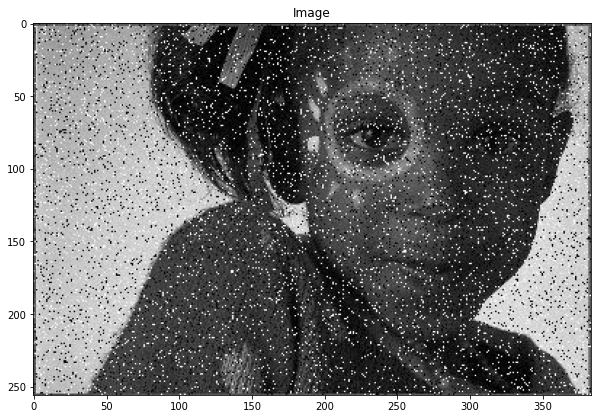

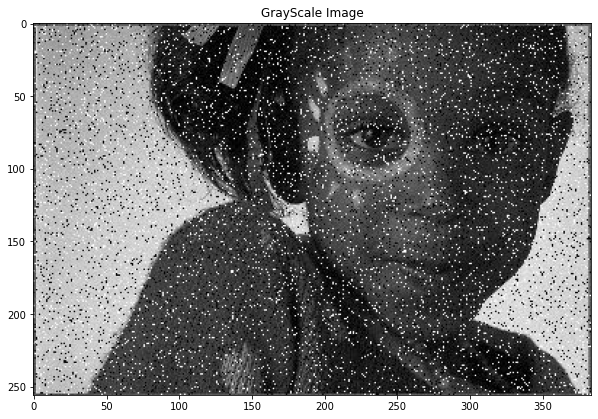

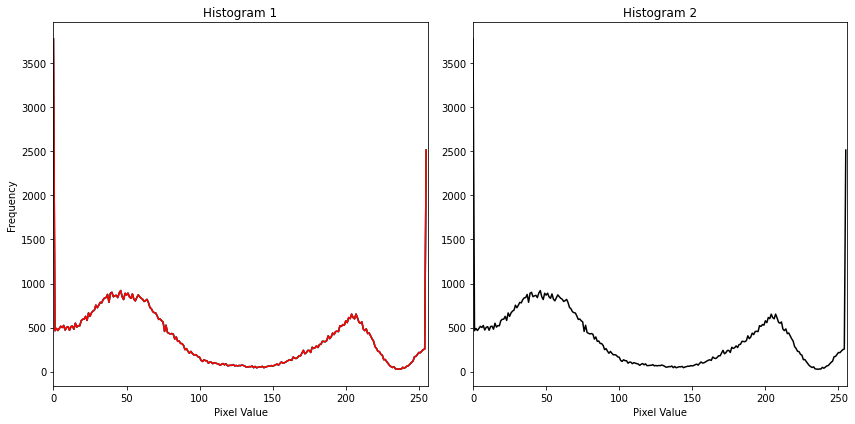

In [100]:
showImg(img, 'Image')
showImg(gray, 'GrayScale Image')
plot_two_histograms(img, gray)

#### Apply Mean filtering with mask size 3x3 and 5x5

In [101]:
def meanFilter(I, size):

    # Define a custom kernel (example: edge detection kernel)
    kernel = np.ones((size[0], size[1])) / (size[0] * size[1])

    # Apply the custom kernel to the image
    return cv2.filter2D(I, -1, kernel)

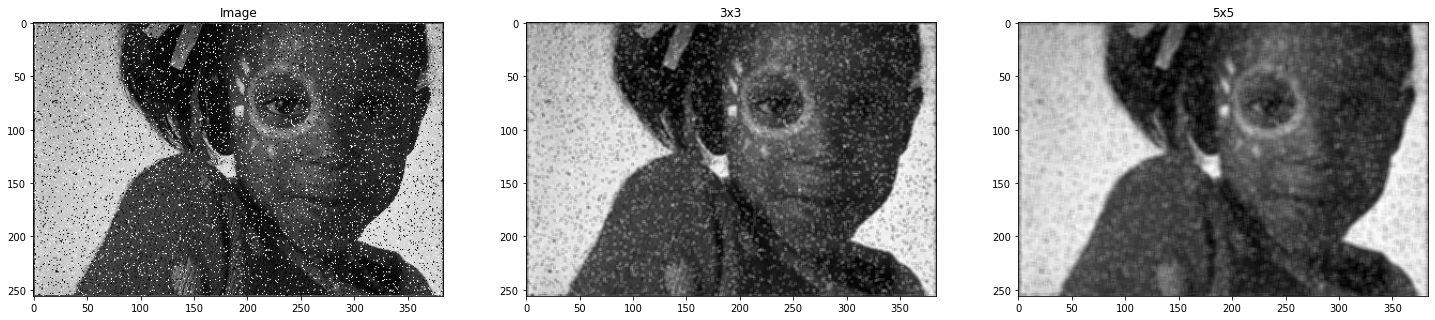

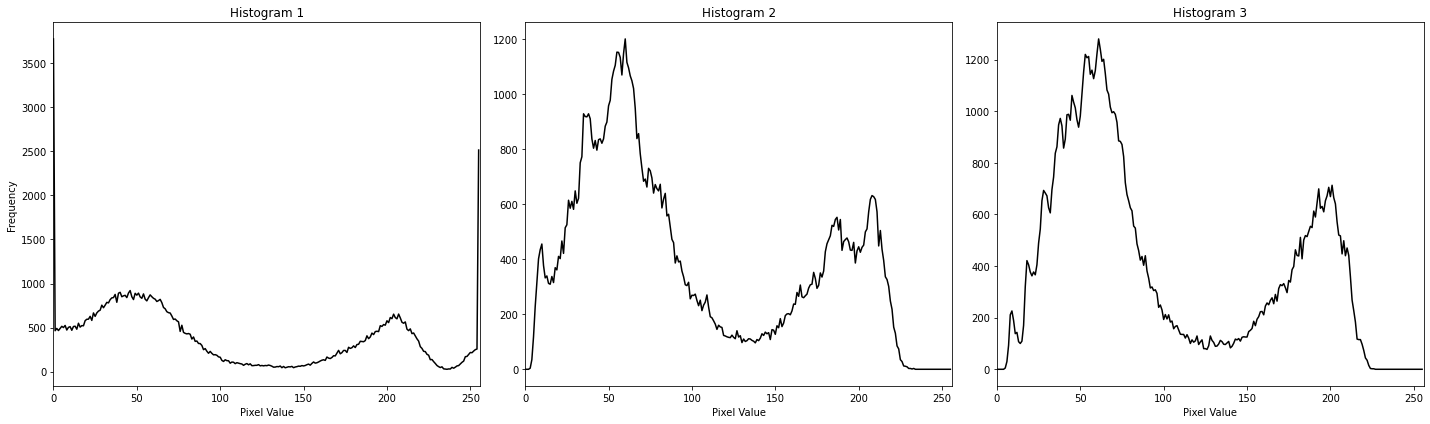

In [102]:
meanImg3 = meanFilter(gray, (3, 3))
meanImg5 = meanFilter(gray, (5, 5))

show3Img(gray, meanImg3, meanImg5, "Mean Filter","Image", "3x3", "5x5")
plot_three_histograms(gray, meanImg3, meanImg5)

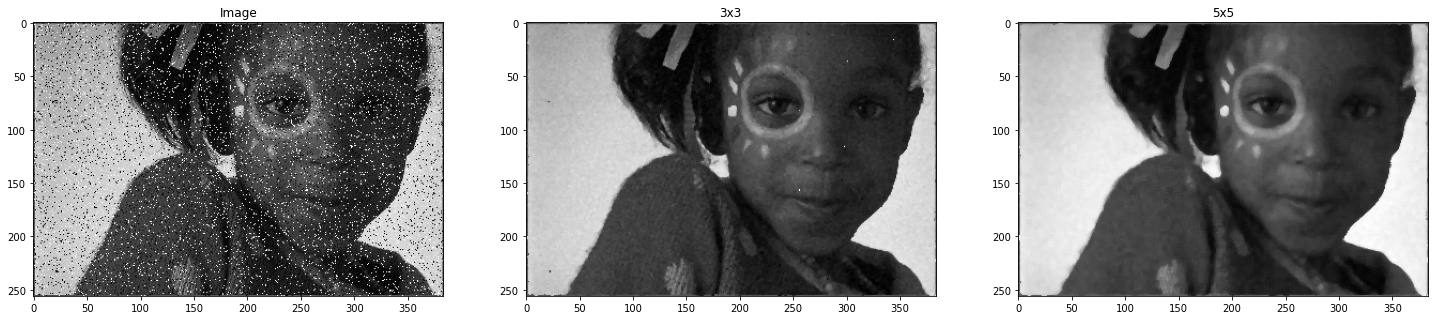

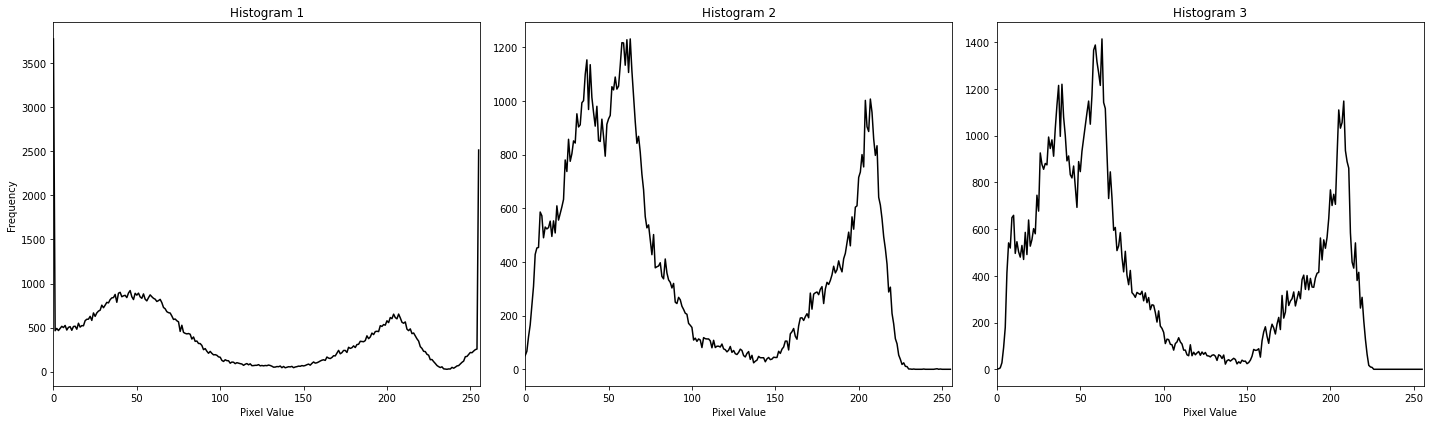

In [103]:
# OpenCV functions
medianImg3 = cv2.medianBlur(gray, 3)
medianImg5 = cv2.medianBlur(gray, 5)

show3Img(gray, medianImg3, medianImg5, "Median Filter","Image", "3x3", "5x5")
plot_three_histograms(gray, medianImg3, medianImg5)

#### Apply Highpass filtering with mask size 3x3 and 5x5

In [104]:
def highPassFilter(I, size):

    # kernal for 3 and 5
    if size == 3:
        kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    elif size == 5:
        kernel = np.array([[-1, -1, -1, -1, -1],
                           [-1,  1,  2,  1, -1],
                           [-1,  2,  4,  2, -1],
                           [-1,  1,  2,  1, -1],
                           [-1, -1, -1, -1, -1]])

    # Apply the custom kernel to the image
    return cv2.filter2D(I, -1, kernel)

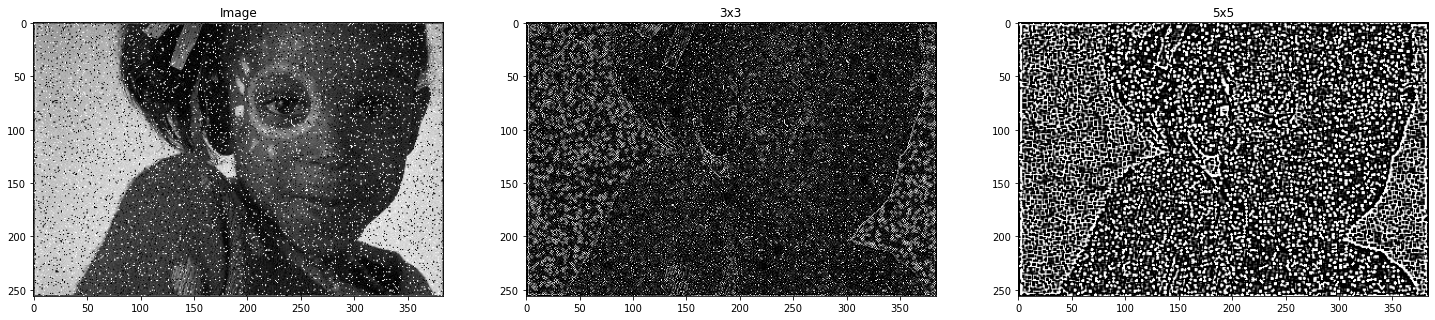

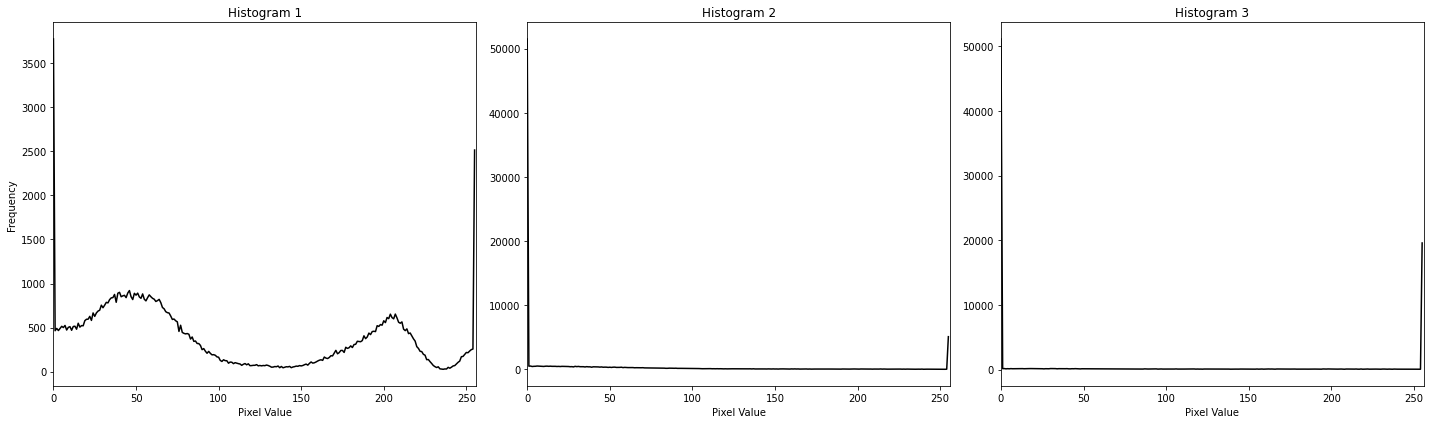

In [105]:
highPassImg3 = highPassFilter(gray, 3)
highPassImg5 = highPassFilter(gray, 5)

show3Img(gray, highPassImg3, highPassImg5, "High Pass Filter","Image", "3x3", "5x5")
plot_three_histograms(gray, highPassImg3, highPassImg5)

#### Apply lowpass filtering with mask size 3x3 and 5x5

In [106]:
def lowPassFilter(I, size):

    # Define a custom kernel (example: edge detection kernel)
    kernel = np.ones((size[0], size[1])) / (size[0] * size[1])

    # Apply the custom kernel to the image
    return cv2.filter2D(I, -1, kernel)

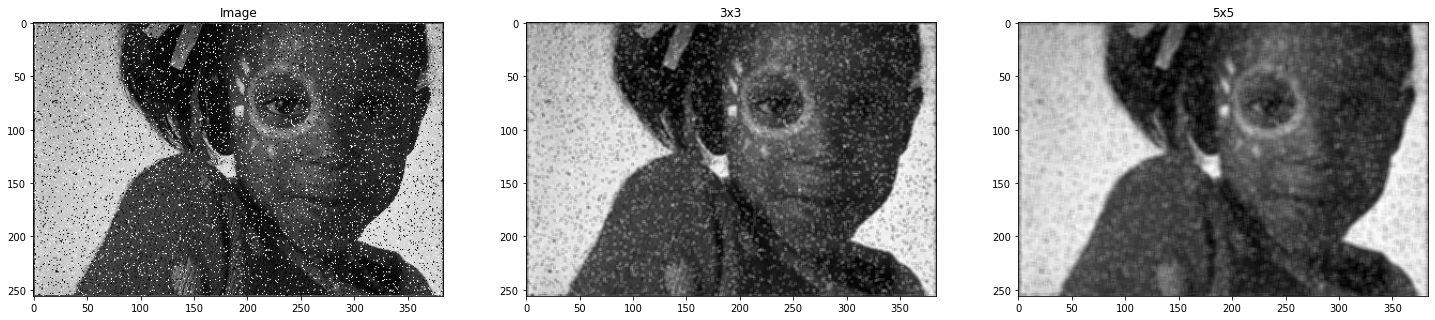

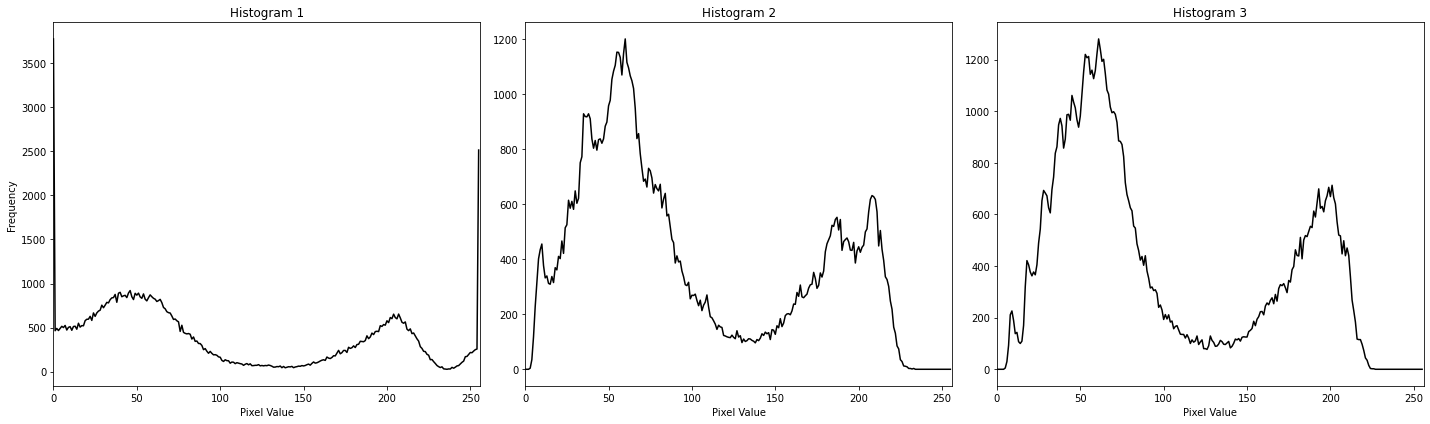

In [107]:
lowPassImg3 = lowPassFilter(gray, (3, 3))
lowPassImg5 = lowPassFilter(gray, (5, 5))

show3Img(gray, lowPassImg3, lowPassImg5, "Low Pass Filter","Image", "3x3", "5x5")
plot_three_histograms(gray, lowPassImg3, lowPassImg5)